# 日経平均株価 日足

In [25]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='6mo')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-28 00:00:00+09:00,38221.378906,38399.910156,38141.488281,38371.761719,88700000,0.0,0.0
2024-08-29 00:00:00+09:00,38119.949219,38401.148438,37970.199219,38362.531250,106500000,0.0,0.0
2024-08-30 00:00:00+09:00,38388.039062,38669.789062,38316.871094,38647.750000,136600000,0.0,0.0
2024-09-02 00:00:00+09:00,39025.308594,39080.640625,38476.511719,38700.871094,87100000,0.0,0.0
2024-09-03 00:00:00+09:00,38745.761719,38967.558594,38581.550781,38686.308594,91200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-20 00:00:00+09:00,38942.910156,38967.011719,38468.718750,38678.039062,125200000,0.0,0.0
2025-02-21 00:00:00+09:00,38523.070312,38808.808594,38456.531250,38776.941406,130100000,0.0,0.0
2025-02-25 00:00:00+09:00,38359.671875,38485.949219,38131.789062,38237.789062,132900000,0.0,0.0


In [26]:
df0 = ticker.history(period='2y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-28 00:00:00+09:00,27515.339844,27585.169922,27400.359375,27445.560547,86300000,0.0,0.0
2023-03-01 00:00:00+09:00,27363.570312,27530.759766,27305.369141,27516.529297,69800000,0.0,0.0
2023-03-02 00:00:00+09:00,27564.820312,27617.800781,27408.539062,27498.869141,69300000,0.0,0.0
2023-03-03 00:00:00+09:00,27683.259766,27961.210938,27655.339844,27927.470703,78200000,0.0,0.0
2023-03-06 00:00:00+09:00,28182.310547,28288.619141,28153.820312,28237.779297,65700000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-20 00:00:00+09:00,38942.910156,38967.011719,38468.718750,38678.039062,125200000,0.0,0.0
2025-02-21 00:00:00+09:00,38523.070312,38808.808594,38456.531250,38776.941406,130100000,0.0,0.0
2025-02-25 00:00:00+09:00,38359.671875,38485.949219,38131.789062,38237.789062,132900000,0.0,0.0


## 日足チャートと Bollinger's bands

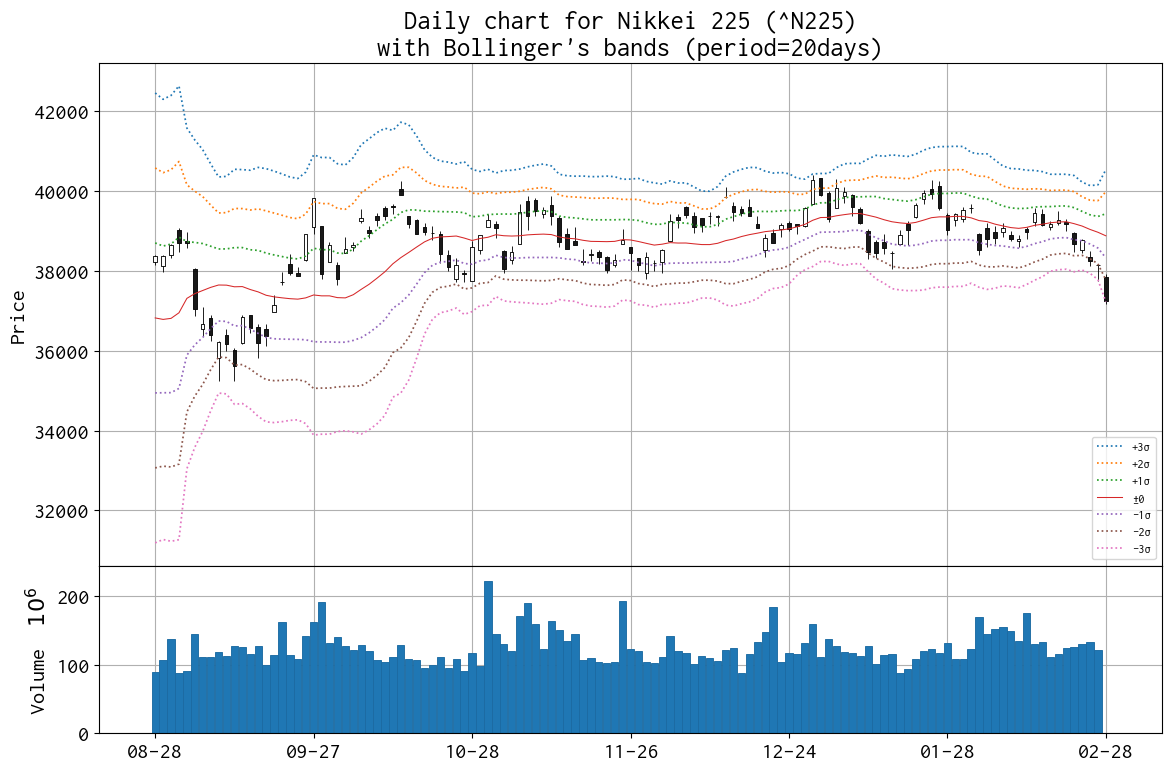

In [27]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1.25, color='C0', linestyle='dotted', label='+3σ', ax=ax[0]),
    mpf.make_addplot(band_upper2[df.index], width=1.25, color='C1', linestyle='dotted', label='+2σ', ax=ax[0]),
    mpf.make_addplot(band_upper1[df.index], width=1.25, color='C2', linestyle='dotted', label='+1σ', ax=ax[0]),
    mpf.make_addplot(band_mean[df.index], width=0.75, color='C3', label='±0', ax=ax[0]),
    mpf.make_addplot(band_lower1[df.index], width=1.25, color='C4', linestyle='dotted', label='-1σ', ax=ax[0]),
    mpf.make_addplot(band_lower2[df.index], width=1.25, color='C5', linestyle='dotted', label='-2σ', ax=ax[0]),
    mpf.make_addplot(band_lower3[df.index], width=1.25, color='C6', linestyle='dotted', label='-3σ', ax=ax[0]),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_%s.png' % code)
plt.show()

In [28]:
len(df)

121

In [29]:
df.tail(2)['Close']

Date
2025-02-26 00:00:00+09:00    38142.371094
2025-02-28 00:00:00+09:00    37241.648438
Name: Close, dtype: float64

In [30]:
df.tail(2)['Close'].diff()

Date
2025-02-26 00:00:00+09:00           NaN
2025-02-28 00:00:00+09:00   -900.722656
Name: Close, dtype: float64

In [31]:
df['Close'].rolling(25).mean()

Date
2024-08-28 00:00:00+09:00             NaN
2024-08-29 00:00:00+09:00             NaN
2024-08-30 00:00:00+09:00             NaN
2024-09-02 00:00:00+09:00             NaN
2024-09-03 00:00:00+09:00             NaN
                                 ...     
2025-02-20 00:00:00+09:00    39129.684531
2025-02-21 00:00:00+09:00    39137.858125
2025-02-25 00:00:00+09:00    39129.311250
2025-02-26 00:00:00+09:00    39098.906094
2025-02-28 00:00:00+09:00    39027.452812
Name: Close, Length: 121, dtype: float64

In [32]:
df['Close'].rolling(75).mean()

Date
2024-08-28 00:00:00+09:00             NaN
2024-08-29 00:00:00+09:00             NaN
2024-08-30 00:00:00+09:00             NaN
2024-09-02 00:00:00+09:00             NaN
2024-09-03 00:00:00+09:00             NaN
                                 ...     
2025-02-20 00:00:00+09:00    39064.476615
2025-02-21 00:00:00+09:00    39057.803958
2025-02-25 00:00:00+09:00    39046.557813
2025-02-26 00:00:00+09:00    39047.740469
2025-02-28 00:00:00+09:00    39031.297135
Name: Close, Length: 121, dtype: float64

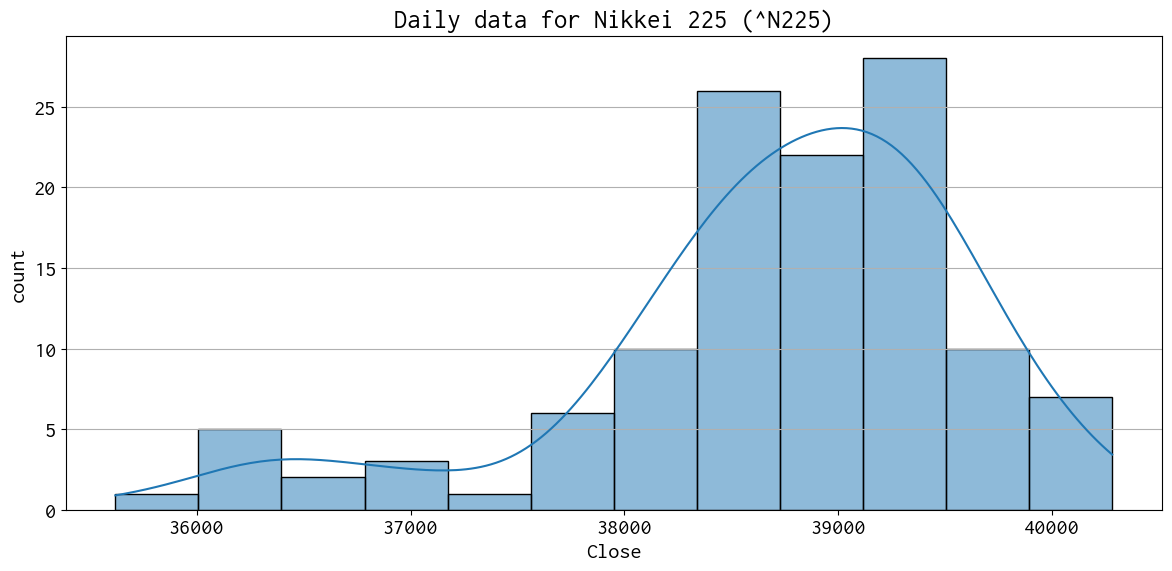

In [33]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Daily data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_%s.png' % code)
plt.show()

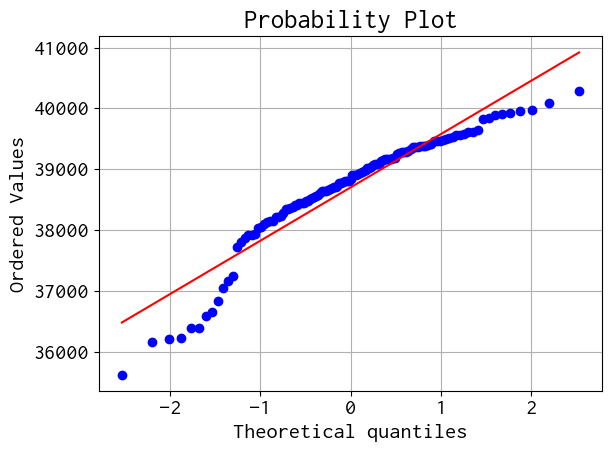

In [34]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()

plt.tight_layout()
plt.savefig('daily_qqplot_%s.png' % code)
plt.show()

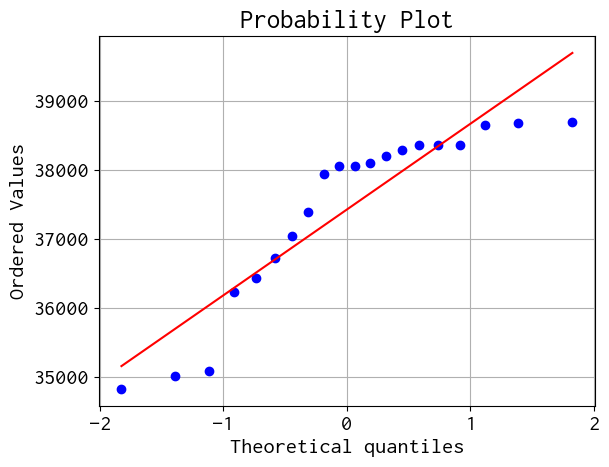

In [11]:
# Q-Qプロットの描画
stats.probplot(df.iloc[0:20]['Close'], dist="norm", plot=plt)

plt.grid()
plt.show()

In [12]:
len(df)

123

In [13]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.893, p-value: 0.000


In [14]:
stat, pval = stats.shapiro(df.iloc[0:20]['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.832, p-value: 0.003


In [15]:
res = stats.anderson(df['Close'])

In [16]:
print('%.3f' % res.statistic)

4.040


In [17]:
print(res.critical_values)

[0.559 0.636 0.763 0.891 1.059]


In [18]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]


In [19]:
res = stats.anderson(df.iloc[0:20]['Close'])

In [20]:
print('%.3f' % res.statistic)

1.316


In [21]:
print(res.critical_values)

[0.506 0.577 0.692 0.807 0.96 ]


In [22]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
